In [2]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 51.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=f6e902146ac39242b62f9d84423de02d1491f841dff5ec2dd28fbde733a8b2e8
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [3]:
# Importnado as libraries

import pandas as pd
import ydata_profiling
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

df = pd.read_csv('/content/data.csv', encoding = 'latin-1')

# Análise descritiva

In [4]:
# Utilizando .describe() para obter um panorama geral do dataset

df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
# A partir do resultado, é possível notar que a coluna InvoiceDate não está
# configurada como datetime, que a coluna CustomerID está como float e que a
# coluna CustomerID apresenta valores nulos. Dessa forma, vou primeiro abordar
# os valores nulos para depois tratar a coluna InvoiceDate e CustomerID.

df['CustomerID'].isna().sum()

135080

In [7]:
# Utilizando a função dropna() para dropar todas as linhas que possuem valores nulos.
df.dropna(inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [8]:
# Checando a presença de dados nulos ou < 0 na coluna UnitPrice

df[df['UnitPrice'] < 0 | df['UnitPrice'].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    0 non-null      object 
 1   StockCode    0 non-null      object 
 2   Description  0 non-null      object 
 3   Quantity     0 non-null      int64  
 4   InvoiceDate  0 non-null      object 
 5   UnitPrice    0 non-null      float64
 6   CustomerID   0 non-null      float64
 7   Country      0 non-null      object 
dtypes: float64(2), int64(1), object(5)
memory usage: 0.0+ bytes


In [9]:
# Como UnitPrice não possui valores < 0 ou nulos, não é necessário aplicar o
# filtro na coluna, dessa forma, irei prosseguir para a análise da coluna
# Quantity

df[df['Quantity'] < 0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 8905 entries, 141 to 541717
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    8905 non-null   object 
 1   StockCode    8905 non-null   object 
 2   Description  8905 non-null   object 
 3   Quantity     8905 non-null   int64  
 4   InvoiceDate  8905 non-null   object 
 5   UnitPrice    8905 non-null   float64
 6   CustomerID   8905 non-null   float64
 7   Country      8905 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 626.1+ KB


In [10]:
# Temos valores negativos na coluna Quantity. Para poder realizar o cálculo
# correto do RFM no futuro, irei filtrar o dataset para que a coluna tenha
# apenas números positivos.

df = df[df['Quantity'] > 0]

df[df['Quantity'] < 0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    0 non-null      object 
 1   StockCode    0 non-null      object 
 2   Description  0 non-null      object 
 3   Quantity     0 non-null      int64  
 4   InvoiceDate  0 non-null      object 
 5   UnitPrice    0 non-null      float64
 6   CustomerID   0 non-null      float64
 7   Country      0 non-null      object 
dtypes: float64(2), int64(1), object(5)
memory usage: 0.0+ bytes


In [ ]:
# Checando duplicatas

duplicatedCheck = df.duplicated(keep = False)

df[duplicatedCheck].info()

<class 'pandas.core.frame.DataFrame'>
Index: 10001 entries, 485 to 541701
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    10001 non-null  object 
 1   StockCode    10001 non-null  object 
 2   Description  10001 non-null  object 
 3   Quantity     10001 non-null  int64  
 4   InvoiceDate  10001 non-null  object 
 5   UnitPrice    10001 non-null  float64
 6   CustomerID   10001 non-null  float64
 7   Country      10001 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 703.2+ KB


In [ ]:
# Dropando duplicatas
df.drop_duplicates(inplace = True)

df[df.duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    0 non-null      object 
 1   StockCode    0 non-null      object 
 2   Description  0 non-null      object 
 3   Quantity     0 non-null      int64  
 4   InvoiceDate  0 non-null      object 
 5   UnitPrice    0 non-null      float64
 6   CustomerID   0 non-null      float64
 7   Country      0 non-null      object 
dtypes: float64(2), int64(1), object(5)
memory usage: 0.0+ bytes


In [ ]:
# Convertendo a coluna CustomerID para int

df['CustomerID'] = df['CustomerID'].astype('Int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392732 non-null  object 
 1   StockCode    392732 non-null  object 
 2   Description  392732 non-null  object 
 3   Quantity     392732 non-null  int64  
 4   InvoiceDate  392732 non-null  object 
 5   UnitPrice    392732 non-null  float64
 6   CustomerID   392732 non-null  Int64  
 7   Country      392732 non-null  object 
dtypes: Int64(1), float64(1), int64(1), object(5)
memory usage: 27.3+ MB


In [ ]:
# Corrigindo o tipo de dado da coluna InvoiceDate para datetime

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  Int64         
 7   Country      392732 non-null  object        
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 27.3+ MB


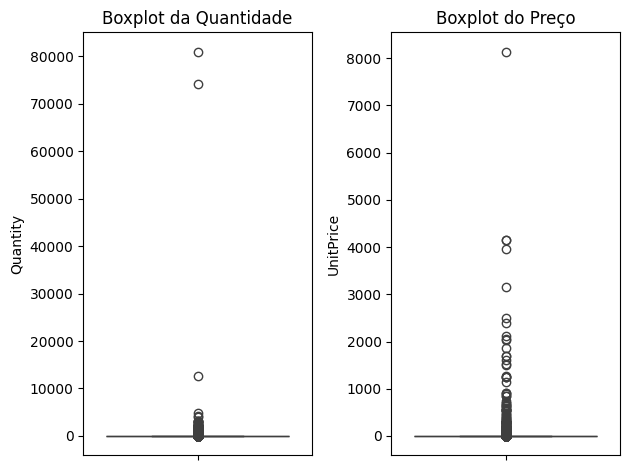

In [ ]:
# Tratando outliers
# Será considerado como outlier extremo uma compra com uma quantiade de item
# acima de 10.000 ou valor unitário de item acima de 5.000.

plt.subplot(1, 2, 1)
sns.boxplot(df['Quantity'])
plt.title('Boxplot da Quantidade');

plt.subplot(1, 2, 2)
sns.boxplot(df['UnitPrice'])
plt.title('Boxplot do Preço');

plt.tight_layout()

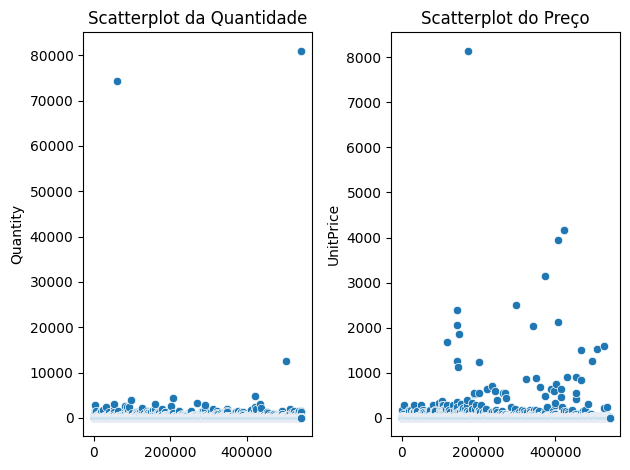

In [12]:
plt.subplot(1, 2, 1)
sns.scatterplot(df['Quantity'])
plt.title('Scatterplot da Quantidade');

plt.subplot(1, 2, 2)
sns.scatterplot(df['UnitPrice'])
plt.title('Scatterplot do Preço');

plt.tight_layout()

In [17]:
# Checando se há outliers extremos com quantidade acima de 10.000 e preço
# unitário acima de 5.000:

df[(df['Quantity'] > 10000) & (df['UnitPrice'] > 5000)].info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    0 non-null      object 
 1   StockCode    0 non-null      object 
 2   Description  0 non-null      object 
 3   Quantity     0 non-null      int64  
 4   InvoiceDate  0 non-null      object 
 5   UnitPrice    0 non-null      float64
 6   CustomerID   0 non-null      float64
 7   Country      0 non-null      object 
dtypes: float64(2), int64(1), object(5)
memory usage: 0.0+ bytes


In [15]:
# Como não há outliers que se encaixam nas duas condições, irei seguir
# Identificando os pedidos com quantidade acima de 10.000:

quantityOutlier = df[df['Quantity'] > 10000]

quantityOutlier

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,11/25/2011 15:57,0.00,13256.0,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446.0,United Kingdom


In [16]:
# Agora vou identificar os pedidos com valor unitário acima de 5000:

unitPriceOutlier = df[df['UnitPrice'] > 5000]

unitPriceOutlier

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
173382,551697,POST,POSTAGE,1,5/3/2011 13:46,8142.75,16029.0,United Kingdom


In [20]:
# Unindo e dropando os outliers

outliers = df[(df['UnitPrice'] > 5000) | (df['Quantity'] > 10000)]

df.drop(outliers.index, inplace = True)

In [ ]:
# Criando uma nova coluna Total para receber o preço final do pedido.

df['Total'] = df['Quantity'] * df['UnitPrice']

display(df.head())
display(df.info())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


<class 'pandas.core.frame.DataFrame'>
Index: 392728 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392728 non-null  object        
 1   StockCode    392728 non-null  object        
 2   Description  392728 non-null  object        
 3   Quantity     392728 non-null  int64         
 4   InvoiceDate  392728 non-null  datetime64[ns]
 5   UnitPrice    392728 non-null  float64       
 6   CustomerID   392728 non-null  Int64         
 7   Country      392728 non-null  object        
 8   Total        392728 non-null  float64       
dtypes: Int64(1), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 30.3+ MB


None

In [ ]:
# Pegando a última data de um pedido presente no dataset para poder fazer o
# cálculo de recência

ultimaData = df['InvoiceDate'].max()

display(ultimaData)

Timestamp('2011-12-09 12:50:00')

<ipython-input-79-bf0325191b81>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = topPaises['Country'], y = topPaises['Total'], palette = 'viridis');


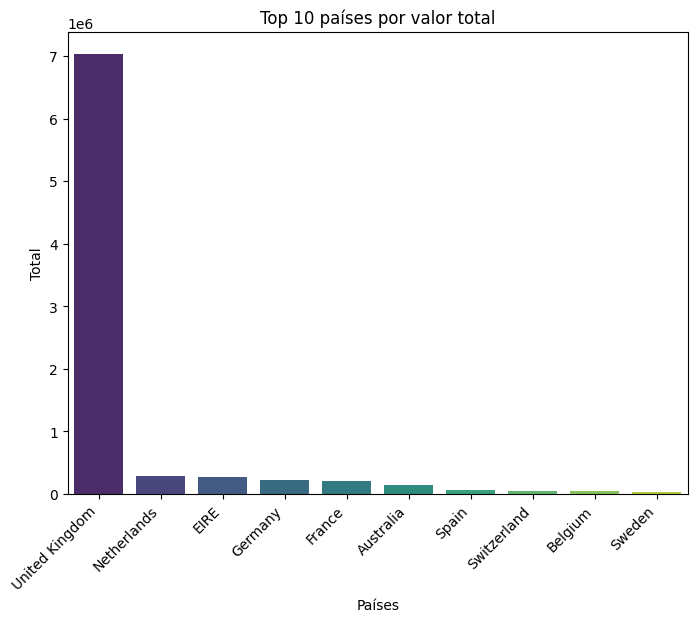

In [ ]:
# Plotando gráfico do Top 10 países com maior total em compras.

valorPaises = df.groupby('Country')['Total'].sum().reset_index()

topPaises = valorPaises.sort_values('Total', ascending=False).head(10)

plt.figure(figsize = (8,6))
sns.barplot(x = topPaises['Country'], y = topPaises['Total'], palette = 'viridis');
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('Países')
plt.ylabel('Total')
plt.title('Top 10 países por valor total')
plt.show()

<ipython-input-80-945bc896a9c7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = topProdutos['Description'], y = topProdutos['Quantity'], palette = 'viridis');


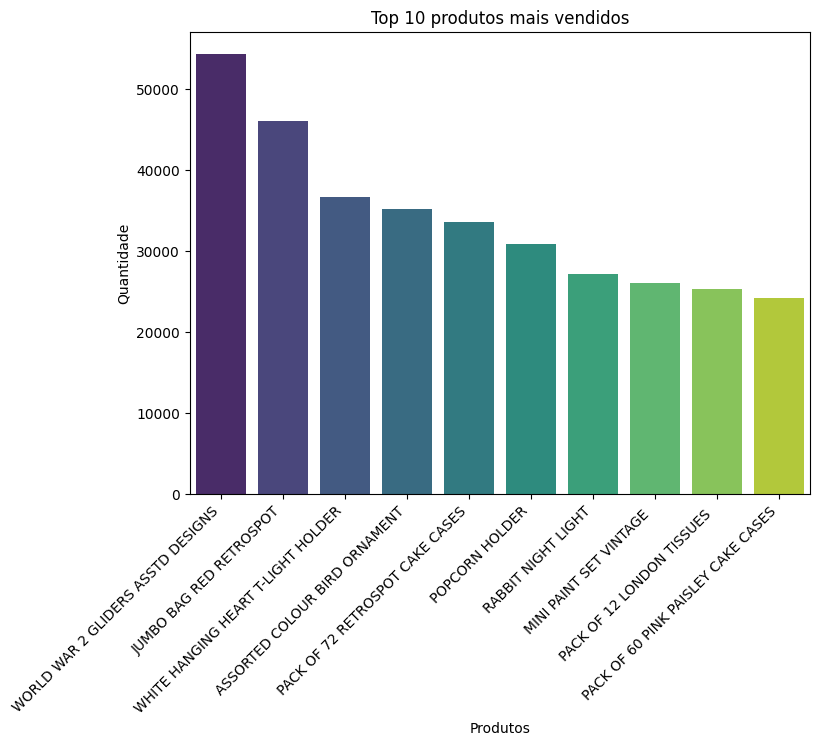

In [ ]:
# Plotando gráfido do top10 produtos mais vendidos

produtos = df.groupby('Description')['Quantity'].sum().reset_index()

topProdutos = produtos.sort_values('Quantity', ascending = False).head(10)

plt.figure(figsize = (8,6))
sns.barplot(x = topProdutos['Description'], y = topProdutos['Quantity'], palette = 'viridis');
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('Produtos')
plt.ylabel('Quantidade')
plt.title('Top 10 produtos mais vendidos')
plt.show()

<ipython-input-81-f72b86314f83>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = topMes['Month'], y = topMes['Total'], palette = 'viridis');


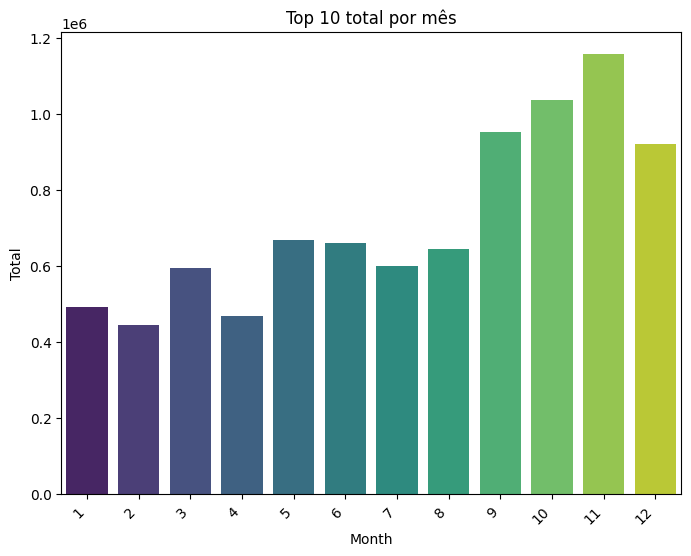

In [ ]:
# Plotando gráfico do valor de vendas totais por mês
# Para isso, irei criar uma nova coluna 'Month'separada para facilitar.

df['Month'] = df['InvoiceDate'].dt.month

mes = df.groupby('Month')['Total'].sum().reset_index()

topMes = mes.sort_values('Total', ascending = False).head(12)

plt.figure(figsize = (8,6))
sns.barplot(x = topMes['Month'], y = topMes['Total'], palette = 'viridis');
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('Month')
plt.ylabel('Total')
plt.title('Top 10 total por mês')
plt.show()

In [ ]:
# Plotando um gráfico do valor de venda total por mês e por país:

dfPais = df[df['Country'].isin(topPaises['Country'].tolist())] # Criando a variável dfPais filtrando o dataframe pelos paises dentro do top10

dfPais

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,12


In [ ]:
# Criando a variavel do mês dentro da lista dfPais:

dfPais['Month'] = dfPais['InvoiceDate'].dt.month

dfPais['Month']

<ipython-input-83-bd7da9039dc4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfPais['Month'] = dfPais['InvoiceDate'].dt.month


,Month
0,12
1,12
2,12
3,12
4,12
...,...
541904,12
541905,12
541906,12
541907,12


In [ ]:
totalMesPais = dfPais.groupby(['Month', 'Country'])['Total'].sum().reset_index()

totalMesPais

,Month,Country,Total
0,1,Australia,9017.71
1,1,Belgium,1200.20
2,1,EIRE,21904.19
3,1,France,17740.12
4,1,Germany,16880.84
...,...,...,...
115,12,Netherlands,20512.50
116,12,Spain,2159.94
117,12,Sweden,4072.30
118,12,Switzerland,1304.92


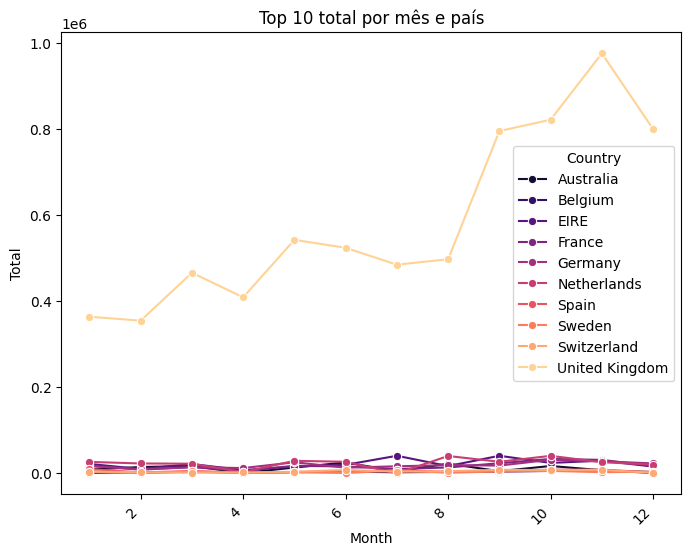

In [ ]:
# Plotando o gráfico:

plt.figure(figsize = (8,6))
sns.lineplot(x = 'Month', y = 'Total', hue = 'Country', data = totalMesPais, palette = 'magma', marker = 'o');
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('Month')
plt.ylabel('Total')
plt.title('Top 10 total por mês e país')
plt.show()

In [ ]:
# Fazendo o RFM.
# Primeiro irei agrupar por CustomerID e InvoiceNo e agregar para que cada que
# cada pedido mostre a data mais recente de compra e o valor total dos pedidos
# do clinte.

pedidos = df.groupby(['CustomerID', 'InvoiceNo']).agg(
    Data = ('InvoiceDate', 'max'),
    ValorTotal = ('Total', 'sum')
).reset_index()

pedidos

,CustomerID,InvoiceNo,Data,ValorTotal
0,12347,537626,2010-12-07 14:57:00,711.79
1,12347,542237,2011-01-26 14:30:00,475.39
2,12347,549222,2011-04-07 10:43:00,636.25
3,12347,556201,2011-06-09 13:01:00,382.52
4,12347,562032,2011-08-02 08:48:00,584.91
...,...,...,...,...
18527,18283,579673,2011-11-30 12:59:00,220.31
18528,18283,580872,2011-12-06 12:02:00,208.00
18529,18287,554065,2011-05-22 10:39:00,765.28
18530,18287,570715,2011-10-12 10:23:00,1001.32


In [ ]:
# Agora irei fazer o RFM de fato:

rfm = pedidos.groupby('CustomerID').agg(
    Recencia = ('Data', lambda x: (ultimaData - x.max()).days),
    Frequencia = ('InvoiceNo', 'count'),
    TicketMedio = ('ValorTotal', 'mean')
).reset_index()

rfm

,CustomerID,Recencia,Frequencia,TicketMedio
0,12347,1,7,615.714286
1,12348,74,4,449.310000
2,12349,18,1,1757.550000
3,12350,309,1,334.400000
4,12352,35,8,313.255000
...,...,...,...,...
4332,18280,277,1,180.600000
4333,18281,180,1,80.820000
4334,18282,7,2,89.025000
4335,18283,3,16,127.845625


In [ ]:
rfm.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]